# Sales Prediction of a Sandwich Store Chain


**Welcome to my project from a real-life Sandwich stores dataset from a POS(point-of-sale) system of 10 stores across a state in the United States of America.**
<br>One of the main reasons why I chose this dataset is the fact that the data is limited and so is most of the data from small to medium size businesses in most rural counties anywhere in the world. The data available is the weekly sales of their menu items for a period of a year from 2012 - 2013.

<br>The sales data were anonymized by renaming menu items and renumbering the stores. Locations were anonymized by changing the names of cities, counties, and states. None of the other data was changed so that any conclusions drawn from the data can still be valid. Keys to de-anonymize the data are held by the authors.

<br> The data may be correlated to demographics, crime and weather, but have chosen to focus on sales of the menu items to predict and leave the correlations to other factors for another day.

<br>A link to the dataset can be found here:
https://data.mendeley.com/datasets/6htjnfs78b/1
<br>Published: 2019-05-17
<br>DOI: 10.17632/6htjnfs78b.1


In [1]:
# Import all the requirement for the entire workbook

import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
# ^^^ pyforest auto-imports - don't write above this line
# All the required imports

import pandas as pd
import datetime as dt
from datetime import date 
import numpy as np
import calendar
import csv
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import scipy.stats as stats
import csv
import string
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import r2_score
from statsmodels.tsa.api import VAR
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [13]:
# For Windows Machine
stores = pd.read_csv(r"C:\Users\WorkStation\PythonDocs\Sandwich Analytics\AppWichStoreAttributes.csv")
data = pd.read_csv(r"file:///C:/Users/WorkStation/PythonDocs/Sandwich Analytics/weekly_sales_10stores.csv")

In [14]:
demo = pd.read_csv(r"C:\Users\WorkStation\PythonDocs\Sandwich Analytics\county_demographic.csv")
empl = pd.read_csv(r"C:\Users\WorkStation\PythonDocs\Sandwich Analytics\county_employment.csv")

In [148]:
demo_empl = pd.merge(demo , empl, how = 'left', on='County_Name')
demo_empl.columns = ['store_county', 'county_total_census_pop', 'county_non-hispanic_white',
       'county_non-hispanic_black', 'county_non-hispanic_native_american',
       'county_non-hispanic_asian', 'county_non-hispanic_pacific_islander',
       'county_non-hispanic_two_or_more', 'county_hispanic_white',
       'county_hispanic_black', 'county_hispanic_native_american',
       'county_hispanic_asian', 'county_hispanic_pacific_islander',
       'county_hispanic_two_or_more', 'county_labor_force', 'county_employed',
       'county_unemployed', 'county_unemployment_rate']
demo_empl

,store_county,county_total_census_pop,county_non-hispanic_white,county_non-hispanic_black,county_non-hispanic_native_american,county_non-hispanic_asian,county_non-hispanic_pacific_islander,county_non-hispanic_two_or_more,county_hispanic_white,county_hispanic_black,county_hispanic_native_american,county_hispanic_asian,county_hispanic_pacific_islander,county_hispanic_two_or_more,county_labor_force,county_employed,county_unemployed,county_unemployment_rate
0,Appleton County,246977,114474,1918,9195,2629,183,4200,103919,1590,5002,870,312,2685,"121,082","108,267","12,815",10.6
1,Farm County,76820,52523,596,2443,708,105,1439,17409,193,838,132,36,398,"36,674","33,354","3,320",9.1
2,Lake County,91723,51806,788,774,851,73,1509,33452,804,941,154,51,520,"43,914","39,740","4,174",9.5
3,Power County,182398,134533,2265,1351,5089,223,3963,32294,485,776,278,112,1029,"92,041","83,467","8,574",9.3
4,Rail County,85845,37009,1702,421,1593,123,1267,41344,549,721,232,204,680,"39,167","35,366","3,801",9.7
5,River County,59404,43588,974,439,787,158,1161,11455,159,342,72,26,243,"29,564","27,361","2,203",7.5


In [96]:
'''
# For Linux Machine
stores = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/AppWichStoreAttributes.csv")
data = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/weekly_sales_10stores.csv")

'''

'\n# For Linux Machine\nstores = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/AppWichStoreAttributes.csv")\ndata = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/weekly_sales_10stores.csv")\n\n'

In [149]:
# Convert Date to pd.datetime format
data['Date'] = pd.to_datetime(data['Year'].astype(str) + 
                              '-' + data['Month'].astype(str).str.zfill(2) + 
                              '-'+ data['Day'].astype(str).str.zfill(2))

# Standardize columns name to lower case
data.columns = data.columns.str.lower()

(<matplotlib.axes._subplots.AxesSubplot at 0x1e80cb029c8>,
 date
 2012-04-01    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-08    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-15    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-22    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-28                                     [7]
 2012-04-29       [2, 5, 9, 11, 14, 16, 19, 23, 24]
 2012-05-06    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-05-13    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-05-20    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-05-27    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-03    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-10    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-17    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-24    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-01    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-08    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-15    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-22    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]

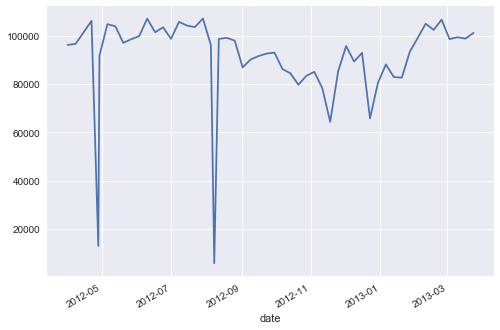

In [150]:
# Where all stores operational duirng the year of operation. Shows that during 2 x 2 weeks, only single stores were operational.
# Speculating that this may be due to renovation or process changes

data.groupby('date').sales.sum().plot(), data.groupby('date').store_num.unique().head(25)

Plotting the sales revenue of the entire franchise across the year, we notice 2 dips. Investigating further it is found that 1 store is kept operational while the others are closed. The following week the inoperational stores were put back up online while the other lone store was closed down. My speculation here is that, there may have been a process change or renovation change made by the store management.
<br>It was thought to be best to change the change the dates of Store# 7 on 2012-04-28 to 2012-04-29 and Store#24 on 2012-08-08 to 2012-08-05.

(<matplotlib.axes._subplots.AxesSubplot at 0x1e810b133c8>,
 date
 2012-04-01    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-08    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-15    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-22    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-04-29    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-05-06    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-05-13    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-05-20    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-05-27    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-03    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-10    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-17    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-06-24    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-01    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-08    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-15    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-22    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]
 2012-07-29    [2, 5, 7, 9, 11, 14, 16, 19, 23, 24]

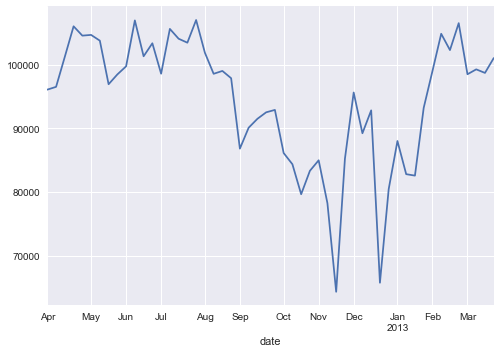

In [151]:
# Data wrangling  to have continous data.

data.date = data.date.astype(str).replace('2012-04-28', '2012-04-29') 
data.date = data.date.astype(str).replace('2012-08-08', '2012-08-05')
data['date'] = pd.to_datetime(data['date'])
data.groupby('date').sales.sum().plot(), data.groupby('date').store_num.unique().head(25)


Now that the descrepancy of dates and operational stores has been solved, the two major dips now observed coincides with Thanksgiving and Christmas holidays.

In [6]:
# Create a weekday column for EDA.
data['weekday'] = data['date'].dt.day_name()

# Merge stores and sales data to form once dataframe for EDA and ML.
stores.columns = stores.columns.str.lower()
data = pd.merge(data,stores,on=['store_num'],how='left')
data.columns

Index(['inv_number', 'store_num', 'description', 'price', 'sold', 'del',
       'sales', 'tot_sls', 'unit_cost', 'cost', 'cost_percent', 'margin',
       'profit', 'date', 'year', 'month', 'day', 'weekday', 'store_name',
       'store_city', 'store_county', 'store_state', 'store_weather_station',
       'store_location', 'store_drive_through', 'store_near_school',
       'store_competition_fastfood', 'store_competition_otherfood',
       'store_traveller_clients', 'store_minority_clients',
       'annual_rent_estimate'],
      dtype='object')

In [7]:
# Drop irrelevant columns from the DataFrame

data.drop(['inv_number', 'del','store_weather_station','store_competition_fastfood', 'store_competition_otherfood',
       'store_traveller_clients', 'store_minority_clients'],axis=1,inplace=True)

In [8]:
# ALl variables are in their appropriate classes.

data['store_drive_through'] = data['store_drive_through'].astype(bool)
data['store_near_school'] = data['store_near_school'].astype(bool)
data['annual_rent_estimate'] = data['annual_rent_estimate'].replace('20,700','20700')
data['annual_rent_estimate'] = pd.to_numeric(data['annual_rent_estimate'])
data['year_month'] = pd.to_datetime(data['date']).dt.to_period('M')
print(data.dtypes)
data.head()

store_num                        int64
description                     object
price                          float64
sold                             int64
sales                          float64
tot_sls                        float64
unit_cost                      float64
cost                           float64
cost_percent                   float64
margin                         float64
profit                         float64
date                    datetime64[ns]
year                             int64
month                            int64
day                              int64
weekday                         object
store_name                      object
store_city                      object
store_county                    object
store_state                     object
store_location                  object
store_drive_through               bool
store_near_school                 bool
annual_rent_estimate             int64
year_month                   period[M]
dtype: object


,store_num,description,price,sold,sales,tot_sls,unit_cost,cost,cost_percent,margin,...,weekday,store_name,store_city,store_county,store_state,store_location,store_drive_through,store_near_school,annual_rent_estimate,year_month
0,2,REGULAR FLATBREAD SPICY IT,5.75,1,7.0,0.0004,0.0000,0.00,0.000000,0.0006,...,Sunday,Power City FreeStand,Power City,Power County,North State,Free Standing,True,True,63000,2012-04
1,2,SUNRISE MELT REGULAR FLATBREAD,6.25,1,6.0,0.0004,1.7589,1.76,0.293151,0.0004,...,Sunday,Power City FreeStand,Power City,Power County,North State,Free Standing,True,True,63000,2012-04
2,2,REGULAR BLT,5.00,59,295.0,0.0180,0.9700,57.23,0.194000,0.0206,...,Sunday,Power City FreeStand,Power City,Power County,North State,Free Standing,True,True,63000,2012-04
3,2,MINI SAVORY TURKEY BT & HAM,4.75,25,125.0,0.0076,1.0636,26.59,0.212723,0.0085,...,Sunday,Power City FreeStand,Power City,Power County,North State,Free Standing,True,True,63000,2012-04
4,2,REGULAR FLATBREAD STEAK CHEESE,8.25,3,24.0,0.0015,0.0000,0.00,0.000000,0.0021,...,Sunday,Power City FreeStand,Power City,Power County,North State,Free Standing,True,True,63000,2012-04


In [9]:
# Export data to dataclean1.csv. End of Data Wrangling.
'''
# windows machine. Run only if needed
data.to_csv(r"C:\Users\WorkStation\PythonDocs\Sandwich Analytics\dataclean1.csv")
'''


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 55-56: truncated \UXXXXXXXX escape (<ipython-input-9-31c6621e2b05>, line 5)

In [18]:
########################### END OF DATA WRANGLING ##############################

In [19]:
######################### EXPLORATORY DATA ANALYSIS ##############################

In [2]:
# For Windows Machine

df_org = pd.read_csv(r"C:\Users\WorkStation\PythonDocs\Sandwich Analytics/dataclean1.csv")
df_copy = df_org.copy()
store_list = df_copy.store_num.unique()

In [3]:
# For Linux Machine

#df_org = pd.read_csv("/home/hp/Documents/PythonDocs/Sandwich Analytics/dataclean1.csv")

C:\Users\WorkStation\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<Figure size 720x360 with 0 Axes>

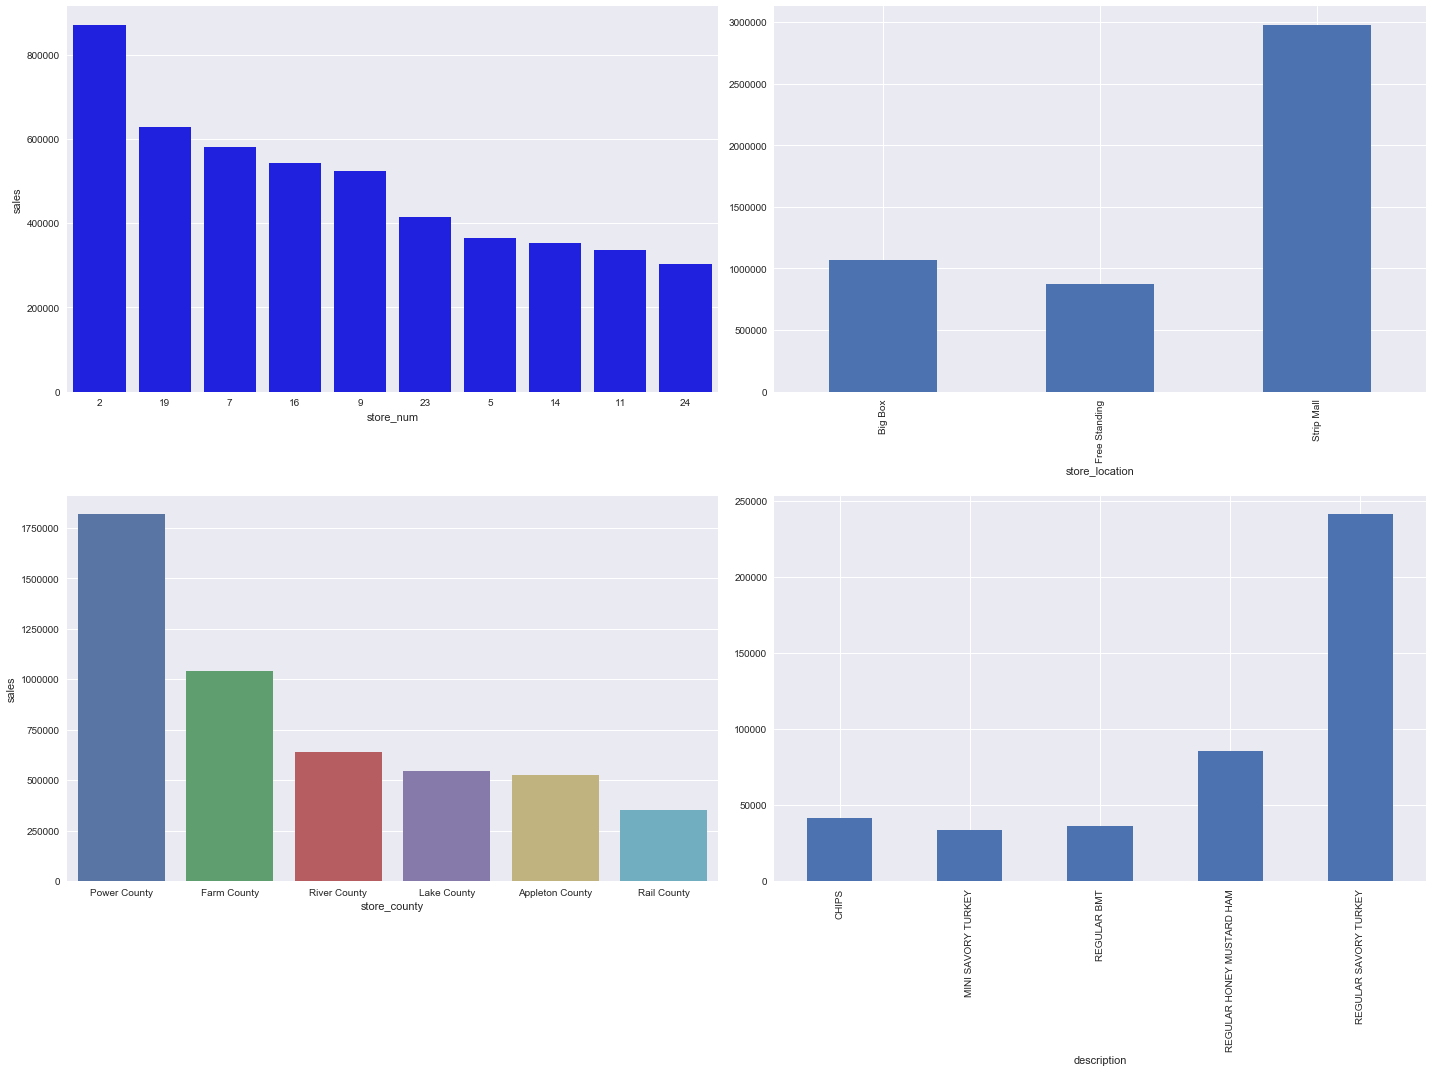

In [4]:
plt.figure(figsize= (10,5))
store_sales = store_sales = pd.DataFrame(df_copy[['store_num', 'sales', 'store_location','store_county']].groupby('store_num').sales.sum().sort_values(ascending = False)).reset_index()
df_copy_cat = pd.DataFrame(df_copy[['store_num', 'sales', 'store_location']]\
                           .groupby(['store_num', 'store_location']).sales.sum().sort_values(ascending = False)).reset_index()
df_copy_cat = df_copy_cat.reset_index()
county_sales = pd.DataFrame(df_copy.groupby('store_county').sales.sum()).sort_values('sales',ascending = False).reset_index()
best_seller = df_copy.groupby('description').sales.sum().sort_values(ascending=False).head(10)
store_location = df_copy_cat.groupby('store_location').sales.sum().sort_values(ascending = False)
description1 = df_copy[['description','store_num','sales','margin']]
description2 = description1.groupby(['description','store_num'])[('sales','margin')].sum().sort_values(by = 'sales',ascending = False).reset_index().head(10)
stores_cmap = {2:'blue', 5:'red', 7:'green', 9:'yellow', 11: 'pink', 14: 'orange', 16: 'brown', 19: 'purple', 23: 'gray', 24: 'purple'}


fig,ax = plt.subplots(2,2, figsize = (20,15))

plt.subplot(2,2,1)
# Createdf_copy_cat.sort_values(by = 'sales',ascending = False).plot(kind = 'bar',ax=ax[0,0])
sns.barplot(data = store_sales, x = 'store_num' , y = 'sales', order = list(store_sales['store_num']),color = 'b')

plt.subplot(2,2,2)
df_copy_cat.groupby('store_location').sales.sum().plot(kind = 'bar')

plt.subplot(2,2,3)
sns.barplot(data = county_sales, x = 'store_county', y = 'sales' , order = df_copy.groupby('store_county').sales.sum().sort_values(ascending = False).index)

plt.subplot(2,2,4)
description2.groupby('description').sales.sum().plot(kind = 'bar')

plt.tight_layout(h_pad=2)
plt.show()



A quick analysis from the EDA

<br>- A total of **\\$ 4.9 million** revenue was generated by the business.
<br>- SN2 out performed with 18% of total revenue
<br>- Strip mall locations with 61% of revenue even though Store# 2 being the lone 'free-standing' store may out perform other stores 
<br>- Possible evaluation of rental vs revenue for a Strip Mall stores.

<br>- This is obvious in Store# 7's rental of \\$54K compared to Store# 2's \\$63K (within 15% of rental) generates 33% lower revenue.


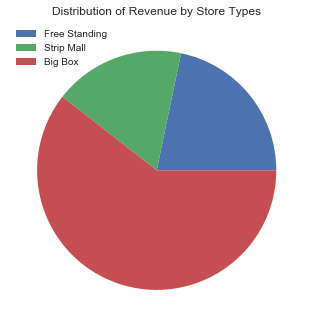

In [5]:
pie = df_copy.groupby(['store_location']).sales.sum()
plt.pie(pie)
plt.title('Distribution of Revenue by Store Types')
plt.legend(loc='upper left', labels=df_copy.store_location.unique())
plt.show()

In [6]:
df_store_revenue = pd.DataFrame(df_copy.groupby(['store_num','store_location','store_county','annual_rent_estimate']).sales.sum().sort_values(ascending=False))
df_store_revenue = df_store_revenue.reset_index().set_index('store_num')
df_store_revenue

,store_location,store_county,annual_rent_estimate,sales
store_num,,,,
2,Free Standing,Power County,63000,870859.58
19,Strip Mall,Farm County,37800,628040.07
7,Strip Mall,Power County,54000,581628.13
16,Strip Mall,Lake County,41400,543373.55
9,Strip Mall,Appleton County,36000,522831.10
23,Big Box,Farm County,20700,414274.98
5,Strip Mall,Power County,48600,365501.78
14,Big Box,Rail County,17500,352152.22
11,Strip Mall,River County,45000,336361.16


In [29]:
# Run only if required.

#demo_empl_df.to_csv(r"C:\Users\WorkStation\PythonDocs\Sandwich Analytics\demo_df.csv")

Text(0.5, 1.0, 'Revenue of the Sandwich Store Chain (Apr 2012 - Mar 2013)')

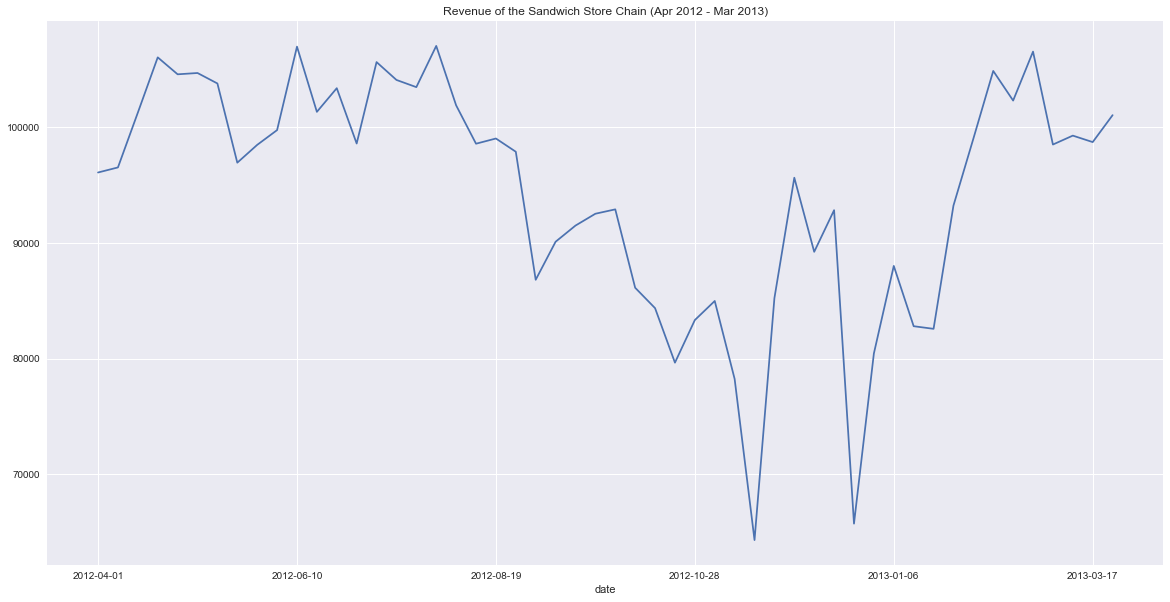

In [7]:
plt.figure(figsize= (20,10))
df_copy.groupby('date').sales.sum().plot()
plt.title('Revenue of the Sandwich Store Chain (Apr 2012 - Mar 2013)')

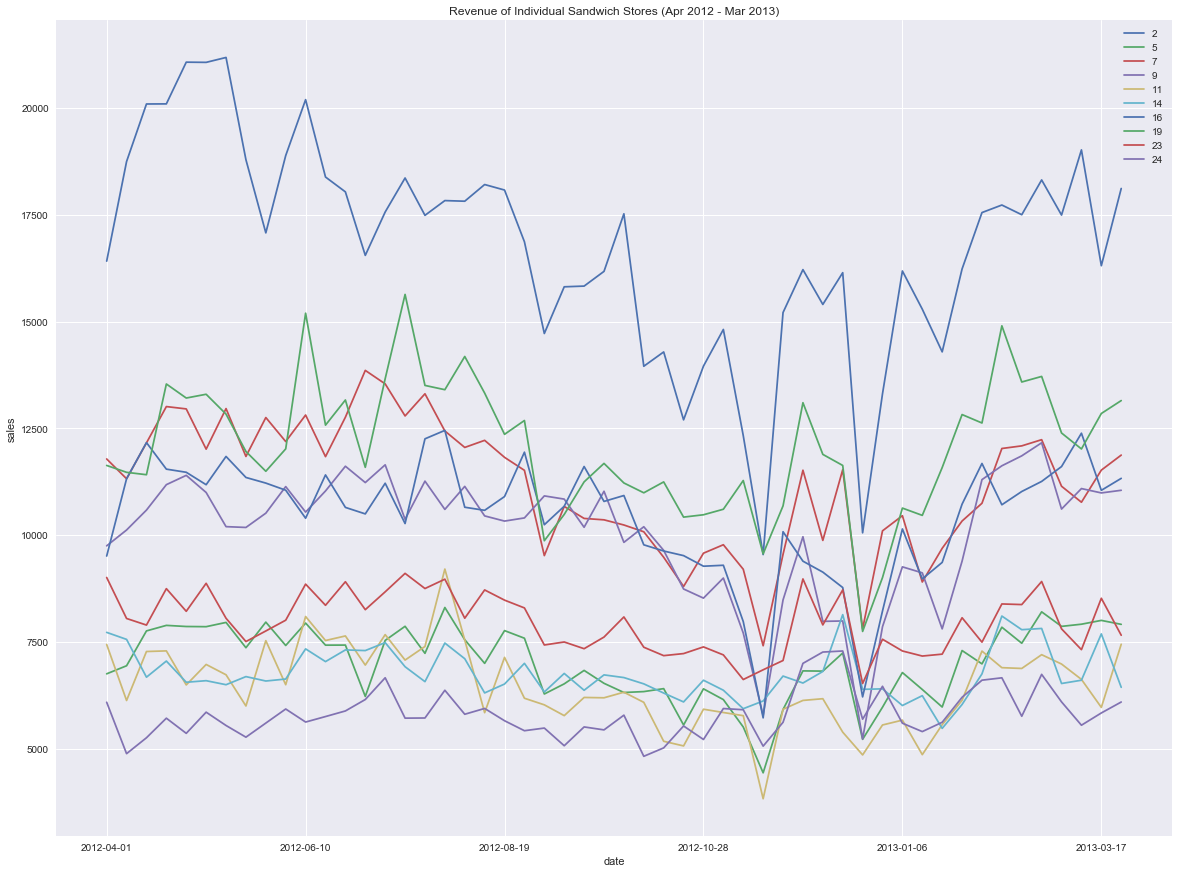

In [8]:
#Plotting of sales of the stores over time.
store_sales = df_copy.groupby(['date','store_num','year_month']).sales.sum()
store_sales = store_sales.reset_index()
store_sales
plt.figure(figsize=(20,15))

for i in store_list:
    sns.lineplot(x = store_sales.date , y = store_sales[store_sales.store_num == i].sales)
    plt.xticks(ticks = ['2012-04-01', '2012-06-10', '2012-08-19', '2012-10-28', '2013-01-06', '2013-03-17'])
    plt.legend(store_sales.store_num)

plt.tight_layout
plt.title('Revenue of Individual Sandwich Stores (Apr 2012 - Mar 2013)')
plt.show()

In [32]:
############################################################################################################################

# Create a DataFrame for Machine Learning

This will be row wise observations on all menu items as columns and will include sales too.
This will mean we will end up with 52 weeks of observations which is not ideal for ML models.


In [109]:
# Create a dataframe for machine learning

sales_byweek = df_copy.groupby('date').sales.sum()
sales_byweek_df = pd.DataFrame(sales_byweek)
pivotted = df_copy.pivot_table(index = 'date' , columns = 'description' , values = 'sales',aggfunc = 'sum')
df_copy_week_description = pd.DataFrame(pivotted.fillna(0).to_records())
df_copy_week_description = pd.merge(df_copy_week_description , sales_byweek_df , on = 'date')
df_copy_week_description.set_index('date',inplace = True)
df_copy_week_description_time = df_copy_week_description.copy()

In [110]:
# Define X and y for Analysis

X = df_copy_week_description.loc[:,df_copy_week_description.columns != 'sales']
y = df_copy_week_description.sales


In [112]:
##
X

,$1 OFF PREMIUM SUB,$1.00 OFF REGULAR & 21OZ,$1.00 OFF REGULAR SUB,$3 BREAKFAST COMBO,$3.00 BREAKFAST COMBO,$7.25 REGULAR FVM W/32OZ BEV,.50 OFF MINI SUB,.99 KIDS PAK,1 COOKIE,"1 COOKIE, REWARDS",...,TURKEY SALAD,TURKEY SALAD DOUBLE,VAL MEAL #1 MINI DOUBLE CHIP,VAL MEAL 1 MINI MTBALL CHIP,VAL MEAL 3 MINI TURKEY CHIP,VEGGIE DELITE SALAD,VEGGIE DELITE SALAD DOUBLE,VINAIGRETTEEGAR,"WRAP, REWARDS",YOGURT PARFAIT
date,,,,,,,,,,,,,,,,,,,,,
2012-04-01,0.0,0.0,-2.0,397.2,25.00,0.0,0.0,0.00,675.10,-46.50,...,74.75,0.00,-2.60,-410.88,-50.46,254.62,0.0,0.0,-7.00,166.20
2012-04-08,0.0,0.0,0.0,309.6,37.50,0.0,0.0,0.00,702.95,-31.75,...,74.75,21.00,-5.18,-433.04,-57.42,135.97,0.0,0.0,-14.00,164.25
2012-04-15,0.0,0.0,-43.0,359.4,32.50,0.0,0.0,0.00,698.90,-74.00,...,80.50,7.00,-5.40,-398.50,-53.38,188.47,0.0,0.0,-7.00,144.90
2012-04-22,0.0,0.0,-14.0,361.2,25.00,0.0,-1.0,0.00,725.70,-59.25,...,109.25,14.00,-4.80,-489.52,-56.26,162.75,0.0,0.0,-7.00,192.90
2012-04-29,0.0,0.0,0.0,504.0,17.50,0.0,0.0,0.00,797.55,-78.75,...,116.13,7.00,-3.40,-472.38,-62.78,126.00,0.0,0.0,-7.00,201.00
2012-05-06,0.0,0.0,0.0,584.1,37.50,0.0,0.0,0.00,795.80,-67.75,...,116.14,21.00,-5.60,-483.60,-58.52,141.75,0.0,0.0,0.00,180.90
2012-05-13,0.0,0.0,0.0,616.2,37.50,0.0,0.0,0.00,773.80,-45.00,...,133.97,56.00,-4.20,-490.62,-58.50,151.72,0.0,0.0,0.00,157.20
2012-05-20,0.0,0.0,0.0,752.4,45.00,0.0,0.0,0.00,755.95,-47.00,...,70.73,30.10,-5.40,-415.80,-58.56,158.54,0.0,0.0,0.00,148.35
2012-05-27,0.0,0.0,0.0,555.0,12.50,0.0,0.0,0.00,671.65,-40.25,...,97.17,28.00,-4.06,-433.54,-50.32,153.29,0.0,0.0,0.00,142.35


In [113]:
#Train Test Split with DATA for SCALED DATA only with no PCA dimension reduction since LR and RFR 
# do not work with scaled PCA transformed data.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

# Run Linear Regression ########################
lr_model = LinearRegression()
lr_model.fit(X_train , y_train)
y_lr_pred = lr_model.predict(X_test)
print('LinearRegression / R2 Score: ', r2_score(y_test , y_lr_pred))
print('Linear Regression / RMSE: ',sqrt(mean_squared_error(y_test,y_lr_pred , squared = False)))

LinearRegression / R2 Score:  0.9204086340894124
Linear Regression / RMSE:  51.06141694641614


In [119]:
# Run Random Forrest Regressor.
# Works only with SCALED DATA and not with PCA (Dimension reduced data) i.e. tried using X_pca_df

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
param_distributions = {'n_estimators': [100,150,200,300],
        'max_depth': [2,3,5,6,7,8,9]}
rnd_for_rgr = RandomizedSearchCV(estimator = rfr,
                          param_distributions = param_distributions,
                          cv = 5, n_jobs = -1)
rnd_for_rgr.fit(X_train,y_train)
rnd_for_rgr.best_params_

{'n_estimators': 300, 'max_depth': 5}

In [125]:
rafor = RandomForestRegressor(n_estimators = 300, max_depth=5,random_state=42)
rafor.fit(X_train,y_train)
pr = rafor.predict(X_test)
print('Random Forest Regressor Result:')
print('RMSE: ',sqrt(mean_squared_error(y_test,pr , squared = False)))
print('R2: ',r2_score(y_test,pr))


Random Forest Regressor Result:
RMSE:  53.34438971187046
R2:  0.9051910116063384


In [18]:
############################################################################################################################

In [121]:
# Using Time Series Split and Grid Search CV to train the XGB model


import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
X_train.shape,y_train.shape,X_test.shape, y_test.shape

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          nthread = 4,
                          seed=42)
parameters = {'max_depth':range(2,10,1),'n_estimators':range(60,220,40),'learning_rate': [0.1,0.01,0.05]}

tscv = TimeSeriesSplit(n_splits=5)
grid_search = GridSearchCV(estimator=xg_reg, 
                           param_grid=parameters, 
                           scoring = 'r2', 
                           n_jobs = 10,
                           cv = tscv, 
                           verbose=True)

grid_search.fit(X_train, y_train)

      
      
# Source: 
# https://stackoverflow.com/questions/46732748/how-do-i-use-a-timeseriessplit-with-a-gridsearchcv-object-to-tune-a-model-in-sci

'''
It turns out the problem was I was using GridSearchCV from sklearn.grid_search, which is deprecated. Importing GridSearchCV from sklearn.model_selection resolved the problem:

import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import numpy as np
X = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T
y = np.array([1, 6, 7, 1, 2, 3])

model = xgb.XGBRegressor()
param_search = {'max_depth' : [3, 5]}

tscv = TimeSeriesSplit(n_splits=2)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search)
gsearch.fit(X, y)
gives:

GridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x11ab4abf8>,
       error_score='raise',
       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)
'''

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.2s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   10.3s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   18.9s
[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   21.9s finished


"\nIt turns out the problem was I was using GridSearchCV from sklearn.grid_search, which is deprecated. Importing GridSearchCV from sklearn.model_selection resolved the problem:\n\nimport xgboost as xgb\nfrom sklearn.model_selection import TimeSeriesSplit, GridSearchCV\nimport numpy as np\nX = np.array([[4, 5, 6, 1, 0, 2], [3.1, 3.5, 1.0, 2.1, 8.3, 1.1]]).T\ny = np.array([1, 6, 7, 1, 2, 3])\n\nmodel = xgb.XGBRegressor()\nparam_search = {'max_depth' : [3, 5]}\n\ntscv = TimeSeriesSplit(n_splits=2)\ngsearch = GridSearchCV(estimator=model, cv=tscv,\n                        param_grid=param_search)\ngsearch.fit(X, y)\ngives:\n\nGridSearchCV(cv=<generator object TimeSeriesSplit.split at 0x11ab4abf8>,\n       error_score='raise',\n       estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,\n       learning_rate=0.1, max_delta_step=0, max_depth=3,\n       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,\n       objective='reg:linear', reg_alph

In [122]:
print('XGB Regressor with TSS, best parameters: ', grid_search.best_params_)

XGB Regressor with TSS, best parameters:  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}


In [123]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          max_depth=2,
                          learning_rate=0.1,
                          n_estimators = 60,
                          nthread = 4,
                          seed=42,
                          cv=tscv)

tscv = TimeSeriesSplit(n_splits=10)


grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    3.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:   12.2s
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed:   21.5s
[Parallel(n_jobs=10)]: Done 480 out of 480 | elapsed:   24.1s finished


In [124]:
print('XGB Regressor RMSE with TSS: ',mean_squared_error(y_test , y_pred , squared = False))
print('XGB Regressor R2 Score with TSS: ',r2_score(y_test,y_pred))

XGB Regressor RMSE with TSS:  2576.8758141194908
XGB Regressor R2 Score with TSS:  0.9222533853120117


# Dimensionality Reduction

In [277]:
X = df_copy_week_description.loc[:,df_copy_week_description.columns != 'sales']
X.index = pd.to_datetime(X.index)
y = pd.DataFrame(df_copy_week_description.sales)
y.index = pd.to_datetime(y.index)

date_df = pd.DataFrame(X.index)
# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# I have now 50 features that will explain 99% of the variance.
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca)

In [278]:
X_scaled_pca_df = pd.merge(X_pca_df, date_df,left_index=True, right_index=True)

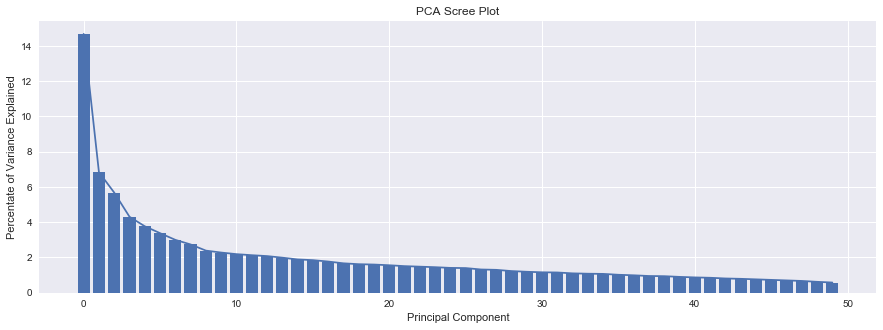

In [279]:
# A scree plot is like a bar chart showing the size of each of the principal components. 
# It helps us to visualize the percentage of variation captured by each of the principal components.
# source: https://www.kindsonthegenius.com/2019/01/12/principal-components-analysispca-in-python-step-by-step/

plt.figure(figsize=(15,5))
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals = 2)
plt.bar(x = X_pca_df.columns, height= percent_variance)
plt.plot(percent_variance)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

Text(0.5, 1.0, 'Explained Variance')

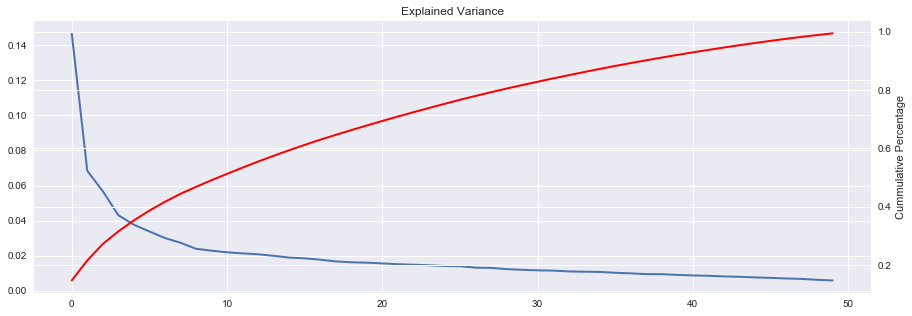

In [280]:
# to be run with pca. n_components = 'None' to find out how many n_components  need to be run
# In any case we can use only 16 components


plt.figure(figsize= (15,5))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax1.plot(pca.explained_variance_ratio_[:500], linewidth = 2)
ax2.plot(pca.explained_variance_ratio_.cumsum()[:300], linewidth = 2, color = 'r')
plt.xlabel('Principal Components')
plt.ylabel('Cummulative Percentage')
plt.title('Explained Variance')

In [281]:
prophet_df = pd.merge(X_scaled_pca_df , y , on='date', how='left')
prophet_df = prophet_df.add_prefix('F_')

In [282]:
prophet_df.rename(columns = {'F_date':'ds', 'F_sales':'y'}, inplace = True)

# Accounting for the Holidays during the period of the dataset
import holidays
hdates = []
hdescr = []
for ptr in holidays.UnitedStates(years = 2012).items(): 
    k,v = ptr[0] , ptr[1]
    hdates.append(k)
    hdescr.append(v)

for ptr in holidays.UnitedStates(years = 2013).items(): 
    k,v = ptr[0] , ptr[1]
    hdates.append(k)
    hdescr.append(v)
holidays = pd.DataFrame({'ds':hdates , 'holiday':hdescr })

In [283]:
prophet_df

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,ds,y
0,9.252885,-2.393528,8.106000,-0.923985,0.364438,-1.912634,-0.846885,-3.092096,-5.700713,3.463968,...,-2.632022,-1.119753,-0.453073,0.047492,1.160999,0.471763,-0.354093,1.627629,2012-04-01,96102.04
1,9.534990,-3.789030,7.940953,-1.005350,0.759761,-6.390018,5.284864,0.990262,-4.864891,0.855696,...,1.703847,1.845733,-0.036544,-1.513157,-1.546306,-1.355960,0.509694,-0.042092,2012-04-08,96540.13
2,10.595884,-6.432487,11.173704,0.748923,0.955545,-4.172634,-0.932600,-5.813015,-1.936307,-1.134698,...,1.879488,-1.398075,0.795850,0.129298,-0.232601,0.332826,0.244439,0.080166,2012-04-15,101279.39
3,14.015601,-6.309894,16.114654,1.495887,0.156233,-7.592890,6.627965,-5.119226,7.935747,4.790322,...,-0.699955,-0.071655,0.132336,0.620242,0.090939,0.461941,-0.285553,-0.513898,2012-04-22,106062.34
4,10.286835,-2.293305,7.471186,1.778204,-5.292100,8.503118,-3.039035,0.880096,8.515095,-8.390095,...,-0.174983,0.958447,0.108678,1.494235,0.608931,-0.642215,-0.284197,0.030843,2012-04-29,104596.05
5,11.765105,-0.086595,3.978101,1.240301,-3.161347,5.933952,-1.048815,8.312256,3.980633,-2.798512,...,0.207201,-1.176311,0.054337,-1.080101,-0.350079,0.103502,0.009661,-0.184530,2012-05-06,104708.57
6,10.417060,-0.048319,4.971240,0.316380,-2.480045,4.451229,-1.422621,4.245336,-0.918855,3.659551,...,1.260355,-0.111220,-0.992049,-0.529660,1.093551,-1.399286,0.716904,-0.950595,2012-05-13,103803.59
7,9.330538,-3.727803,4.227038,2.419559,-5.989464,9.025668,-4.197027,10.532318,-4.234455,4.110541,...,1.504162,1.260313,1.481737,-0.673428,0.152210,0.674030,-0.735023,-0.648599,2012-05-20,96951.21
8,6.809526,1.122741,-1.493952,-0.276344,-1.506116,2.248241,-2.488903,-0.012331,0.691058,2.730933,...,-0.396430,-1.185873,-3.491891,0.061019,-1.732364,1.007885,0.514157,0.535565,2012-05-27,98491.96
9,7.792572,0.334836,-4.747729,-5.983415,-1.484563,5.618770,-6.895523,-7.750747,1.374072,8.494584,...,0.334334,0.273123,0.744158,0.793188,0.712420,0.332856,-0.332896,0.436965,2012-06-03,99769.49


In [284]:
X_train = prophet_df[prophet_df['ds']<="2013-01-13"]
X_test = prophet_df[prophet_df['ds']>"2013-01-13"]
X_train

,F_0,F_1,F_2,F_3,F_4,F_5,F_6,F_7,F_8,F_9,...,F_42,F_43,F_44,F_45,F_46,F_47,F_48,F_49,ds,y
0,9.252885,-2.393528,8.106000,-0.923985,0.364438,-1.912634,-0.846885,-3.092096,-5.700713,3.463968,...,-2.632022,-1.119753,-0.453073,0.047492,1.160999,0.471763,-0.354093,1.627629,2012-04-01,96102.04
1,9.534990,-3.789030,7.940953,-1.005350,0.759761,-6.390018,5.284864,0.990262,-4.864891,0.855696,...,1.703847,1.845733,-0.036544,-1.513157,-1.546306,-1.355960,0.509694,-0.042092,2012-04-08,96540.13
2,10.595884,-6.432487,11.173704,0.748923,0.955545,-4.172634,-0.932600,-5.813015,-1.936307,-1.134698,...,1.879488,-1.398075,0.795850,0.129298,-0.232601,0.332826,0.244439,0.080166,2012-04-15,101279.39
3,14.015601,-6.309894,16.114654,1.495887,0.156233,-7.592890,6.627965,-5.119226,7.935747,4.790322,...,-0.699955,-0.071655,0.132336,0.620242,0.090939,0.461941,-0.285553,-0.513898,2012-04-22,106062.34
4,10.286835,-2.293305,7.471186,1.778204,-5.292100,8.503118,-3.039035,0.880096,8.515095,-8.390095,...,-0.174983,0.958447,0.108678,1.494235,0.608931,-0.642215,-0.284197,0.030843,2012-04-29,104596.05
5,11.765105,-0.086595,3.978101,1.240301,-3.161347,5.933952,-1.048815,8.312256,3.980633,-2.798512,...,0.207201,-1.176311,0.054337,-1.080101,-0.350079,0.103502,0.009661,-0.184530,2012-05-06,104708.57
6,10.417060,-0.048319,4.971240,0.316380,-2.480045,4.451229,-1.422621,4.245336,-0.918855,3.659551,...,1.260355,-0.111220,-0.992049,-0.529660,1.093551,-1.399286,0.716904,-0.950595,2012-05-13,103803.59
7,9.330538,-3.727803,4.227038,2.419559,-5.989464,9.025668,-4.197027,10.532318,-4.234455,4.110541,...,1.504162,1.260313,1.481737,-0.673428,0.152210,0.674030,-0.735023,-0.648599,2012-05-20,96951.21
8,6.809526,1.122741,-1.493952,-0.276344,-1.506116,2.248241,-2.488903,-0.012331,0.691058,2.730933,...,-0.396430,-1.185873,-3.491891,0.061019,-1.732364,1.007885,0.514157,0.535565,2012-05-27,98491.96
9,7.792572,0.334836,-4.747729,-5.983415,-1.484563,5.618770,-6.895523,-7.750747,1.374072,8.494584,...,0.334334,0.273123,0.744158,0.793188,0.712420,0.332856,-0.332896,0.436965,2012-06-03,99769.49


In [362]:
#To do multivariate time series forecasting in Prophet, you need to follow these steps:
# https://stackoverflow.com/questions/54544285/is-it-possible-to-do-multivariate-multi-step-forecasting-using-fb-prophet
#https://towardsdatascience.com/forecast-model-tuning-with-additional-regressors-in-prophet-ffcbf1777dda

prophet_model = Prophet(daily_seasonality=True,
                        weekly_seasonality=True,
                        yearly_seasonality=False,
                        uncertainty_samples = 100, 
                        mcmc_samples=100, 
                        interval_width = 0.5,
                        holidays = holidays,
                       holidays_prior_scale=1000)

#.add_seasonality(name='weekly',period=7,fourier_order=10)#.add_seasonality(name='daily',period=1,fourier_order=15)
prophet_model.add_regressor('F_0')
prophet_model.add_regressor('F_1')
prophet_model.add_regressor('F_2')
prophet_model.add_regressor('F_3')
prophet_model.add_regressor('F_4')
prophet_model.add_regressor('F_5')
prophet_model.add_regressor('F_6')
prophet_model.add_regressor('F_7')
prophet_model.add_regressor('F_8')
prophet_model.add_regressor('F_9')
prophet_model.add_regressor('F_10')
prophet_model.add_regressor('F_11')
prophet_model.add_regressor('F_12')
prophet_model.add_regressor('F_13')
prophet_model.add_regressor('F_14')
prophet_model.add_regressor('F_15')
prophet_model.add_regressor('F_16')
'''
prophet_model.add_regressor('F_17')
prophet_model.add_regressor('F_18')
prophet_model.add_regressor('F_19')
prophet_model.add_regressor('F_20')
prophet_model.add_regressor('F_21')
prophet_model.add_regressor('F_22')
prophet_model.add_regressor('F_23')
prophet_model.add_regressor('F_24')
prophet_model.add_regressor('F_25')
prophet_model.add_regressor('F_26')
prophet_model.add_regressor('F_27')
prophet_model.add_regressor('F_28')
prophet_model.add_regressor('F_29')
prophet_model.add_regressor('F_30')
prophet_model.add_regressor('F_31')
prophet_model.add_regressor('F_32')
prophet_model.add_regressor('F_33')
prophet_model.add_regressor('F_34')
prophet_model.add_regressor('F_35')
prophet_model.add_regressor('F_36')
prophet_model.add_regressor('F_37')
prophet_model.add_regressor('F_38')
prophet_model.add_regressor('F_39')
prophet_model.add_regressor('F_40')
prophet_model.add_regressor('F_41')
prophet_model.add_regressor('F_42')
prophet_model.add_regressor('F_43')
prophet_model.add_regressor('F_44')
prophet_model.add_regressor('F_45')
prophet_model.add_regressor('F_46')
prophet_model.add_regressor('F_47')
prophet_model.add_regressor('F_48')
prophet_model.add_regressor('F_49')
'''



#prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=2)
prophet_model.fit(X_train)


In [363]:
future_df = prophet_model.make_future_dataframe(periods=10 , freq='w', include_history=True)
#no need to have furture_df where you have the prediction dates as you have made the X_test set
prophet_predictions = prophet_model.predict(X_test)

In [364]:
prophet_forecast = prophet_predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

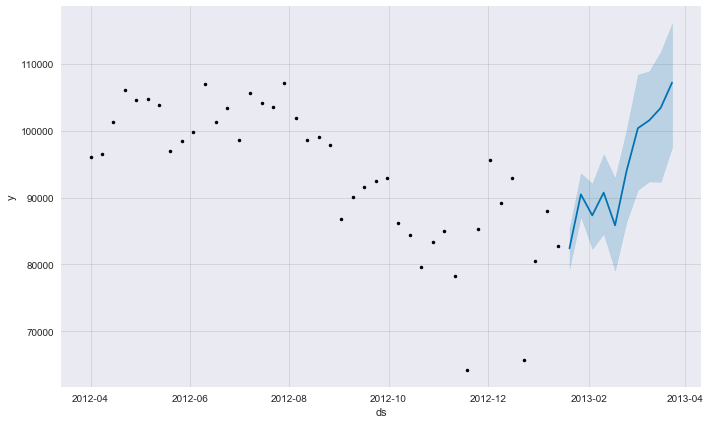

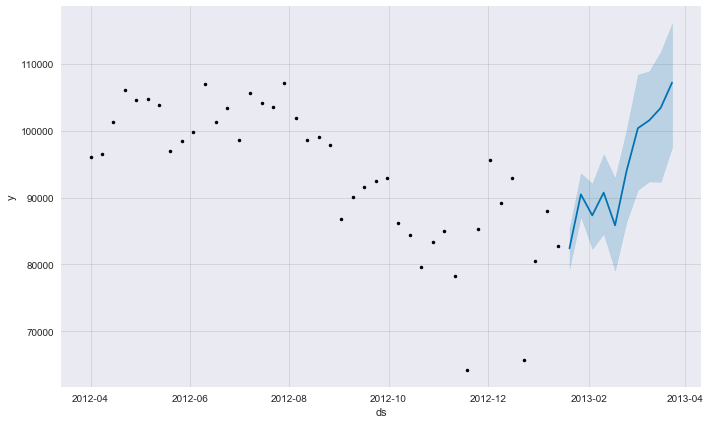

In [365]:
prophet_model.plot(prophet_forecast)

In [366]:
prophet_test_pred_compare = pd.merge(prophet_forecast , X_test, on='ds', how='left')[['ds', 'yhat', 'yhat_lower', 'yhat_upper','y']]

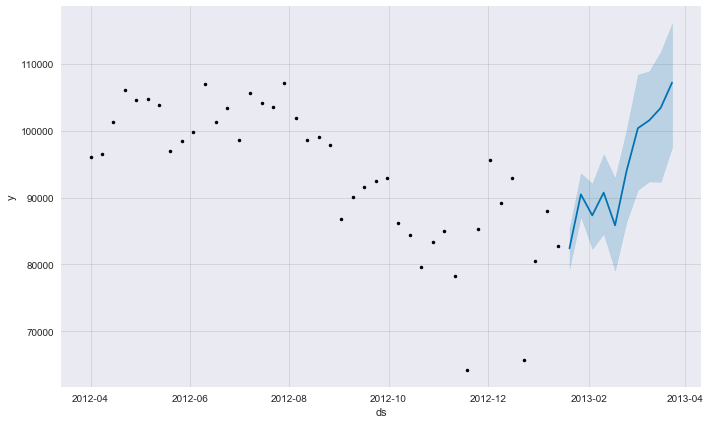

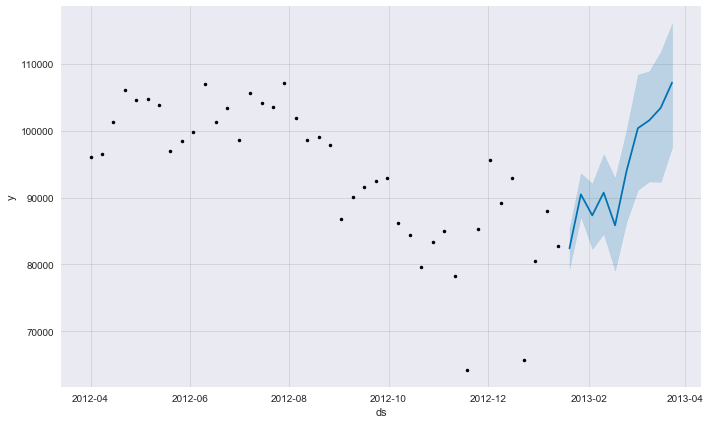

In [367]:
prophet_model.plot(prophet_test_pred_compare)

In [368]:
prophet_test_pred_compare

,ds,yhat,yhat_lower,yhat_upper,y
0,2013-01-20,82394.252648,79395.905140,85406.778149,82577.73
1,2013-01-27,90474.106436,87178.687901,93623.011569,93237.53
2,2013-02-03,87328.382926,82313.053358,92085.923251,99022.46
3,2013-02-10,90731.822677,84587.406395,96459.867146,104887.76
4,2013-02-17,85842.453641,79065.309631,92907.582590,102323.48
5,2013-02-24,93905.739952,86352.600224,100052.640000,106559.38
6,2013-03-03,100351.305817,91149.359429,108356.191353,98520.17
7,2013-03-10,101534.813378,92407.902320,108877.445584,99292.08
8,2013-03-17,103384.047051,92330.535225,111753.884033,98731.88
9,2013-03-24,107173.248068,97508.252603,115971.800894,101062.51


In [377]:
prophet_test_pred_compare['MAPE'] = abs(prophet_test_pred_compare['y'] - prophet_test_pred_compare['yhat'])/prophet_test_pred_compare['y']

In [376]:
print('Facebook Prophet RMSE: ',sqrt(mean_squared_error(prophet_test_pred_compare.y , prophet_test_pred_compare.yhat , squared = False)))
print('Facebook Prophet MAPE: ', prophet_test_pred_compare['MAPE'].mean()*100)


Facebook Prophet RMSE:  95.8462275242784
Facebook Prophet MAPE:  7.134912933542008


(75000, 115000)

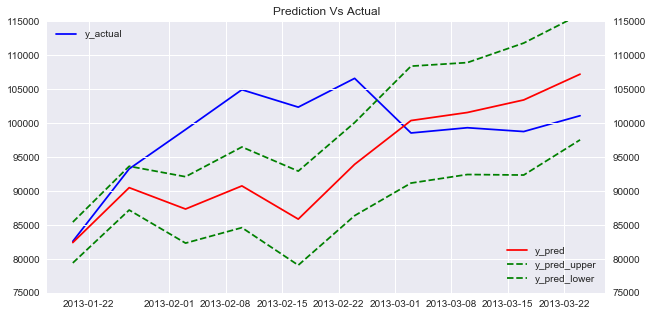

In [395]:
plt.figure(figsize= (10,5))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax2.plot(prophet_test_pred_compare['ds'],prophet_test_pred_compare['yhat'],color = 'r')
ax2.plot(prophet_test_pred_compare['ds'],prophet_test_pred_compare['yhat_upper'],color = 'green', linestyle='dashed')
ax2.plot(prophet_test_pred_compare['ds'],prophet_test_pred_compare['yhat_lower'],color = 'green', linestyle='dashed')
ax1.plot(prophet_test_pred_compare['ds'],prophet_test_pred_compare['y'],color = 'b')
plt.title('Prediction Vs Actual')
labels2  = ['y_pred','y_pred_upper','y_pred_lower']
labels1 = ['y_actual']
ax1.legend(loc='upper left', labels=labels1)
ax2.legend(loc='lower right', labels=labels2)
ax1.set_ylim([75000,115000])
ax2.set_ylim([75000,115000])

In [39]:
# Through all these changes, I managed to get my MAPE down to 5.97% 
# with the baseline model having a MAPE of 22.32%.

In [40]:
###################### USING VAR IN COMPARISON WITH FACEBOOK FORECASTING ################################333

In [384]:
#Source: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

X = df_copy_week_description_time.loc[:,df_copy_week_description_time.columns != 'sales']
y = df_copy_week_description_time.sales

# Scale the data.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Though 36 components explain the variation, Cannot use 36 since the test dataset has 16 observations 
# and cannot have 36 features to predict using 16 observatins. Hence using 16 n_components
pca = PCA(n_components = 16)
X_pca = pca.fit_transform(X_scaled)
X_pca_df = pd.DataFrame(data = X_pca, index= X.index  , columns = ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8',
                                                  'PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16'])
X_pca_df = pd.merge(X_pca_df , y, how = 'left', on = 'date').reset_index()

In [385]:
X_scaled

array([[-0.14002801,  0.14002801, -0.06254644, ...,  0.        ,
        -1.74816004,  1.38485695],
       [-0.14002801,  0.14002801,  0.26269504, ...,  0.        ,
        -3.946192  ,  1.32149564],
       [-0.14002801,  0.14002801, -6.72999677, ...,  0.        ,
        -1.74816004,  0.69275653],
       ...,
       [-0.14002801,  0.14002801,  0.26269504, ...,  0.        ,
         0.44987193,  1.11678989],
       [ 7.14142843,  0.14002801,  0.26269504, ...,  0.        ,
         0.44987193,  0.57090786],
       [-0.14002801,  0.14002801,  0.26269504, ...,  0.        ,
         0.44987193,  0.98519333]])

In [62]:
'''
Types of Stationarity
Let us understand the different types of stationarities and how to interpret the results of the above tests.

Strict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. 
For a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to 
convert a non-stationary series into a strict stationary series for making predictions. 

Trend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. 
Once the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as 
stationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.

Difference Stationary: A time series that can be made strict stationary by differencing falls under difference 
stationary. ADF test is also known as a difference stationarity test. It’s always better to apply both the 
tests, so that we are sure that the series is truly stationary. Let us look at the possible outcomes of applying 
these stationary tests.

Case 1: Both tests conclude that the series is not stationary -> series is not stationary
Case 2: Both tests conclude that the series is stationary -> series is stationary
Case 3: KPSS = stationary and ADF = not stationary  -> trend stationary, remove the trend to make series strict 
stationary
Case 4: KPSS = not stationary and ADF = stationary -> difference stationary, use differencing to make series 
stationary

Here both test indicate that the time series is not stationary
'''

'\nTypes of Stationarity\nLet us understand the different types of stationarities and how to interpret the results of the above tests.\n\nStrict Stationary: A strict stationary series satisfies the mathematical definition of a stationary process. \nFor a strict stationary series, the mean, variance and covariance are not the function of time. The aim is to \nconvert a non-stationary series into a strict stationary series for making predictions. \n\nTrend Stationary: A series that has no unit root but exhibits a trend is referred to as a trend stationary series. \nOnce the trend is removed, the resulting series will be strict stationary. The KPSS test classifies a series as \nstationary on the absence of unit root. This means that the series can be strict stationary or trend stationary.\n\nDifference Stationary: A time series that can be made strict stationary by differencing falls under difference \nstationary. ADF test is also known as a difference stationarity test. It’s always bette

In [386]:
X_pca_df.columns

Index(['date', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8',
       'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16',
       'sales'],
      dtype='object')

In [387]:
CJ1 = X_pca_df[['date', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8','sales']].set_index('date')
CJ2 = X_pca_df[['date', 'PCA9','PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16','sales']].set_index('date')


In [388]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
#johan_test_temp = CJ1.drop([ 'sales'], axis=1)

# result show that no variable show significant and hence reject null hyp
coint_johansen(CJ1,0,1).eig , coint_johansen(CJ2,0,1).eig

(array([0.62190252, 0.56235732, 0.52584979, 0.47280623, 0.32105422,
        0.25977629, 0.19933349, 0.17873113, 0.00812844]),
 array([0.8456654 , 0.71456341, 0.65007067, 0.55617567, 0.53535687,
        0.39917656, 0.27923214, 0.26798173, 0.04471201]))

In [389]:
X_pca_df_t = X_pca_df.set_index('date')

In [390]:
# Checking for stationarity of data using ADF test.

def adf_test(ts, signif=0.05):
    dftest = adfuller(ts, autolag='AIC')
    adf = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags','# Observations'])
    for key,value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)
    
    p = adf['p-value']
    if p <= signif:
        print(f" Series is Stationary")
    else:
        print(f" Series is Non-Stationary")
#apply adf test on the series
adf_test(X_pca_df["PCA1"])
adf_test(X_pca_df["PCA2"])
adf_test(X_pca_df["PCA3"])
adf_test(X_pca_df["PCA4"])
adf_test(X_pca_df["PCA5"])
adf_test(X_pca_df["PCA6"])
adf_test(X_pca_df["PCA7"])
adf_test(X_pca_df["PCA8"])
adf_test(X_pca_df["PCA9"])
adf_test(X_pca_df["PCA10"])
adf_test(X_pca_df["PCA11"])
adf_test(X_pca_df["PCA12"])
adf_test(X_pca_df["PCA13"])
adf_test(X_pca_df["PCA14"])
adf_test(X_pca_df["PCA15"])
adf_test(X_pca_df["PCA16"])



Test Statistic          -1.176971
p-value                  0.683423
# Lags                   0.000000
# Observations          51.000000
Critical Value (1%)     -3.565624
Critical Value (5%)     -2.920142
Critical Value (10%)    -2.598015
dtype: float64
 Series is Non-Stationary
Test Statistic          -1.153278
p-value                  0.693365
# Lags                   0.000000
# Observations          51.000000
Critical Value (1%)     -3.565624
Critical Value (5%)     -2.920142
Critical Value (10%)    -2.598015
dtype: float64
 Series is Non-Stationary
Test Statistic          -2.178974
p-value                  0.213965
# Lags                   2.000000
# Observations          49.000000
Critical Value (1%)     -3.571472
Critical Value (5%)     -2.922629
Critical Value (10%)    -2.599336
dtype: float64
 Series is Non-Stationary
Test Statistic          -2.807847
p-value                  0.057162
# Lags                   2.000000
# Observations          49.000000
Critical Value (1%)     -3.

In [391]:
# PCA 1 - 5 is not stationary and 

X_pca_df_diff = X_pca_df.drop(['date','sales','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13','PCA14','PCA15','PCA16'],
                              axis = 1).diff().dropna()

In [392]:
adf_test(X_pca_df_diff["PCA1"])
adf_test(X_pca_df_diff["PCA2"])
adf_test(X_pca_df_diff["PCA3"])
adf_test(X_pca_df_diff["PCA4"])
adf_test(X_pca_df_diff["PCA5"])


Test Statistic         -8.424049e+00
p-value                 1.948441e-13
# Lags                  0.000000e+00
# Observations          5.000000e+01
Critical Value (1%)    -3.568486e+00
Critical Value (5%)    -2.921360e+00
Critical Value (10%)   -2.598662e+00
dtype: float64
 Series is Stationary
Test Statistic         -7.775538e+00
p-value                 8.689644e-12
# Lags                  0.000000e+00
# Observations          5.000000e+01
Critical Value (1%)    -3.568486e+00
Critical Value (5%)    -2.921360e+00
Critical Value (10%)   -2.598662e+00
dtype: float64
 Series is Stationary
Test Statistic         -6.695845e+00
p-value                 4.001713e-09
# Lags                  1.000000e+00
# Observations          4.900000e+01
Critical Value (1%)    -3.571472e+00
Critical Value (5%)    -2.922629e+00
Critical Value (10%)   -2.599336e+00
dtype: float64
 Series is Stationary
Test Statistic          -4.291717
p-value                  0.000459
# Lags                   3.000000
# Observat

In [393]:
X_pca_df2_diff = pd.merge(X_pca_df_diff , X_pca_df.drop(['PCA1','PCA2','PCA3','PCA4','PCA5'],axis=1) , how = 'right',left_index=True, right_index=True).fillna(0)

In [394]:
X_pca_df2_diff

,PCA1,PCA2,PCA3,PCA4,PCA5,date,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,sales
0,0.000000,0.000000,0.000000,0.000000,0.000000,2012-04-01,-1.909108,-0.786866,-3.003893,-6.165507,-3.256232,-6.934342,5.384774,-4.482430,2.074222,-2.935203,1.691125,96102.04
1,0.282292,-1.393784,-0.162342,-0.054781,0.386402,2012-04-08,-6.426888,5.197912,0.973041,-4.864990,0.082253,-2.148345,7.301942,-2.738002,-0.827087,6.806821,-2.410477,96540.13
2,1.060856,-2.642272,3.236219,1.733072,0.244255,2012-04-15,-4.130305,-0.954279,-5.745009,-2.024438,0.821257,-3.931805,-3.383483,-7.672545,-3.654256,-2.035112,2.365045,101279.39
3,3.419680,0.120294,4.935140,0.751785,-0.846200,2012-04-22,-7.625700,6.601226,-5.127249,8.159317,-5.032046,4.810115,-2.861707,7.912854,1.312576,-0.356995,-1.411485,106062.34
4,-3.728665,4.015240,-8.645137,0.278496,-5.445220,2012-04-29,8.431573,-3.045755,1.134858,8.140459,9.464093,1.313397,-0.643193,-5.672443,0.588290,-2.861703,6.867205,104596.05
5,1.478070,2.211720,-3.486702,-0.530203,2.160686,2012-05-06,6.008437,-1.041376,8.157412,4.381438,3.059756,6.008284,9.080679,-1.940002,1.372720,-3.727263,-6.995756,104708.57
6,-1.347969,0.035972,0.996467,-0.910469,0.629776,2012-05-13,4.480857,-1.372636,4.118067,-0.798344,-4.639277,-3.916431,-3.171308,7.442303,0.061276,-6.811295,-0.597209,103803.59
7,-1.086561,-3.680373,-0.753671,2.073386,-3.481975,2012-05-20,9.029469,-4.191489,10.484824,-4.331102,-4.709234,-3.938721,-5.000864,1.860549,0.576882,8.077972,1.345508,96951.21
8,-2.520975,4.849188,-5.716991,-2.667284,4.539211,2012-05-27,2.213033,-2.464533,0.069301,0.647019,-2.847353,2.397869,-4.789427,-0.252908,-1.720180,0.637511,-1.701071,98491.96
9,0.983165,-0.784108,-3.255269,-5.722433,-0.011072,2012-06-03,5.613024,-7.010620,-7.784203,1.626017,-7.981040,3.042509,0.036125,-4.162776,4.906129,2.444010,-4.794553,99769.49


In [396]:
# Info: http://www.eviews.com/help/helpintro.html#page/content/coint-Johansen_Cointegration_Test.html

CJ3 = X_pca_df2_diff[['date', 'PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8','sales']].set_index('date')
CJ4 = X_pca_df2_diff[['date', 'PCA9','PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16','sales']].set_index('date')
coint_johansen(CJ3,-1,1).eig , coint_johansen(CJ4,-1,1).eig

# no significance and hence the variables are not dependent on each other.

(array([6.84644761e-01, 6.30151481e-01, 5.12254035e-01, 4.13739631e-01,
        3.37595192e-01, 2.65170779e-01, 2.31373382e-01, 1.33071806e-01,
        1.83935257e-06]),
 array([8.13300017e-01, 7.13276646e-01, 6.50722012e-01, 5.37363172e-01,
        5.27807457e-01, 3.96988584e-01, 2.79266318e-01, 2.67009477e-01,
        5.61375939e-06]))

In [397]:
X_pca_df2_diff.rename(columns = {'date':'ds','sales':'y'},inplace=True)
X_pca_df2_diff.set_index('ds', inplace=True)

In [398]:
X_train = X_pca_df2_diff.iloc[:41 , :]
y_train = X_pca_df2_diff.iloc[:41 , :][['y']]
X_test = X_pca_df2_diff.iloc[42: , :].drop('y',axis = 1)
y_test = X_pca_df2_diff.iloc[42: , :][['y']]

In [399]:
X_train.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,PCA14,PCA15,PCA16,y
ds,,,,,,,,,,,,,,,,,
2012-04-01,0.000000,0.000000,0.000000,0.000000,0.000000,-1.909108,-0.786866,-3.003893,-6.165507,-3.256232,-6.934342,5.384774,-4.482430,2.074222,-2.935203,1.691125,96102.04
2012-04-08,0.282292,-1.393784,-0.162342,-0.054781,0.386402,-6.426888,5.197912,0.973041,-4.864990,0.082253,-2.148345,7.301942,-2.738002,-0.827087,6.806821,-2.410477,96540.13
2012-04-15,1.060856,-2.642272,3.236219,1.733072,0.244255,-4.130305,-0.954279,-5.745009,-2.024438,0.821257,-3.931805,-3.383483,-7.672545,-3.654256,-2.035112,2.365045,101279.39
2012-04-22,3.419680,0.120294,4.935140,0.751785,-0.846200,-7.625700,6.601226,-5.127249,8.159317,-5.032046,4.810115,-2.861707,7.912854,1.312576,-0.356995,-1.411485,106062.34
2012-04-29,-3.728665,4.015240,-8.645137,0.278496,-5.445220,8.431573,-3.045755,1.134858,8.140459,9.464093,1.313397,-0.643193,-5.672443,0.588290,-2.861703,6.867205,104596.05


In [54]:
model_var = VAR(endog = X_train)
model_var_fit = model_var.fit()
yhat = model_var_fit.forecast(model_var_fit.y, steps=10)

C:\Users\WorkStation\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

C:\Users\WorkStation\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:36: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



In [55]:
model_var_pred = pd.DataFrame(yhat, index = X_test.index).drop(np.arange(0,16),axis=1).rename(columns = {16:'y_pred'})

In [56]:
model_var_pred_compare = pd.merge(model_var_pred , y_test , how = 'left' , 
                                  on = model_var_pred.index).rename(columns={'key_0':'dates'}).set_index('dates')

In [57]:
# MEAN ABSOLUTE PERCENTAGE ERROR for VAR Model

mape_var = (abs(model_var_pred_compare.y_pred - model_var_pred_compare.y)/model_var_pred_compare.y).mean()*100
mape_var

25.007724311062805

In [58]:
model_var_pred_compare

,y_pred,y
dates,,
2013-01-20,81480.044369,82577.73
2013-01-27,70579.165188,93237.53
2013-02-03,68847.091723,99022.46
2013-02-10,68668.073254,104887.76
2013-02-17,68786.637979,102323.48
2013-02-24,71034.579440,106559.38
2013-03-03,73357.729255,98520.17
2013-03-10,74776.103441,99292.08
2013-03-17,77086.157306,98731.88


(60000, 110000)

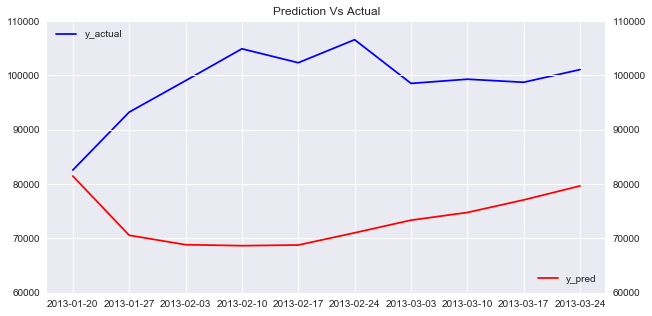

In [59]:
plt.figure(figsize= (10,5))
ax1 = plt.subplot(111)
ax2 = ax1.twinx()
ax2.plot(model_var_pred_compare['y_pred'],color = 'r')
ax1.plot(model_var_pred_compare['y'],color = 'b')
plt.title('Prediction Vs Actual')
labels2  = ['y_pred']
labels1 = ['y_actual']
ax1.legend(loc='upper left', labels=labels1)
ax2.legend(loc='lower right', labels=labels2)
ax1.set_ylim([60000,110000])
ax2.set_ylim([60000,110000])


In [88]:
print('VAR model RMSE: ',sqrt(mean_squared_error(model_var_pred_compare.y ,model_var_pred_compare.y_pred , squared = False)))
print('VAR model MAPE: ', mape_var)

VAR model RMSE:  173.2855581581434
VAR model MAPE:  27.871933325620514


In [ ]:
#############################################################################################################################